# 베스트 모델 만들기

In [6]:
import pandas as pd

df_pre = pd.read_csv('./dataset/wine.csv')
df = df_pre.sample(frac=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 4615 to 2779
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.5 KB
None


# 모델 업데이트 하기

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200, validation_split=0.2, verbose=0, callbacks=[checkpointer])

# 결과 출력
print("\n Accuracy : %.4f" %(model.evaluate(X,Y)[1]))


Epoch 00001: val_loss improved from inf to 0.29722, saving model to ./model/01-0.2972.hdf5

Epoch 00002: val_loss improved from 0.29722 to 0.25425, saving model to ./model/02-0.2543.hdf5

Epoch 00003: val_loss improved from 0.25425 to 0.23356, saving model to ./model/03-0.2336.hdf5

Epoch 00004: val_loss improved from 0.23356 to 0.21444, saving model to ./model/04-0.2144.hdf5

Epoch 00005: val_loss improved from 0.21444 to 0.19984, saving model to ./model/05-0.1998.hdf5

Epoch 00006: val_loss improved from 0.19984 to 0.19539, saving model to ./model/06-0.1954.hdf5

Epoch 00007: val_loss improved from 0.19539 to 0.19016, saving model to ./model/07-0.1902.hdf5

Epoch 00008: val_loss did not improve from 0.19016

Epoch 00009: val_loss improved from 0.19016 to 0.18586, saving model to ./model/09-0.1859.hdf5

Epoch 00010: val_loss improved from 0.18586 to 0.18406, saving model to ./model/10-0.1841.hdf5

Epoch 00011: val_loss did not improve from 0.18406

Epoch 00012: val_loss improved from


Epoch 00108: val_loss did not improve from 0.05686

Epoch 00109: val_loss did not improve from 0.05686

Epoch 00110: val_loss did not improve from 0.05686

Epoch 00111: val_loss improved from 0.05686 to 0.05665, saving model to ./model/111-0.0567.hdf5

Epoch 00112: val_loss did not improve from 0.05665

Epoch 00113: val_loss improved from 0.05665 to 0.05583, saving model to ./model/113-0.0558.hdf5

Epoch 00114: val_loss did not improve from 0.05583

Epoch 00115: val_loss did not improve from 0.05583

Epoch 00116: val_loss did not improve from 0.05583

Epoch 00117: val_loss improved from 0.05583 to 0.05531, saving model to ./model/117-0.0553.hdf5

Epoch 00118: val_loss did not improve from 0.05531

Epoch 00119: val_loss did not improve from 0.05531

Epoch 00120: val_loss did not improve from 0.05531

Epoch 00121: val_loss did not improve from 0.05531

Epoch 00122: val_loss did not improve from 0.05531

Epoch 00123: val_loss did not improve from 0.05531

Epoch 00124: val_loss did not im

# 그래프로 표현하기

Epoch 1/3500
9/9 [==============================] - 1s 25ms/step - loss: 0.5628 - accuracy: 0.7594 - val_loss: 0.3829 - val_accuracy: 0.8214
Epoch 2/3500
9/9 [==============================] - 0s 9ms/step - loss: 0.3644 - accuracy: 0.8676 - val_loss: 0.2947 - val_accuracy: 0.8909
Epoch 3/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.3236 - accuracy: 0.8784 - val_loss: 0.2806 - val_accuracy: 0.8974
Epoch 4/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.3038 - accuracy: 0.8987 - val_loss: 0.2638 - val_accuracy: 0.9254
Epoch 5/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.2877 - accuracy: 0.9150 - val_loss: 0.2551 - val_accuracy: 0.9310
Epoch 6/3500
9/9 [==============================] - 0s 9ms/step - loss: 0.2757 - accuracy: 0.9113 - val_loss: 0.2412 - val_accuracy: 0.9263
Epoch 7/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.2664 - accuracy: 0.9120 - val_loss: 0.2353 - val_accuracy: 0.9268
Epoch 8/3500
9/9 [=

9/9 [==============================] - 0s 7ms/step - loss: 0.1368 - accuracy: 0.9504 - val_loss: 0.1368 - val_accuracy: 0.9529
Epoch 60/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1370 - accuracy: 0.9499 - val_loss: 0.1349 - val_accuracy: 0.9515
Epoch 61/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.1350 - accuracy: 0.9508 - val_loss: 0.1401 - val_accuracy: 0.9552
Epoch 62/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1381 - accuracy: 0.9499 - val_loss: 0.1344 - val_accuracy: 0.9534
Epoch 63/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1361 - accuracy: 0.9490 - val_loss: 0.1369 - val_accuracy: 0.9557
Epoch 64/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1305 - accuracy: 0.9497 - val_loss: 0.1353 - val_accuracy: 0.9576
Epoch 65/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.1297 - accuracy: 0.9513 - val_loss: 0.1341 - val_accuracy: 0.9548
Epoch 66/3500
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9731 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch 118/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.0848 - val_accuracy: 0.9716
Epoch 119/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0838 - val_accuracy: 0.9730
Epoch 120/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0890 - accuracy: 0.9747 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 121/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9747 - val_loss: 0.0863 - val_accuracy: 0.9753
Epoch 122/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9738 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 123/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9727 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 124/3500
9/9 [=

Epoch 175/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0711 - accuracy: 0.9809 - val_loss: 0.0683 - val_accuracy: 0.9795
Epoch 176/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0743 - accuracy: 0.9795 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 177/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0747 - accuracy: 0.9793 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 178/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0710 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 179/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9814 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 180/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0690 - accuracy: 0.9812 - val_loss: 0.0656 - val_accuracy: 0.9809
Epoch 181/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0687 - accuracy: 0.9805 - val_loss: 0.0674 - val_accuracy: 0.9772
Epoch 

Epoch 233/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0617 - accuracy: 0.9828 - val_loss: 0.0573 - val_accuracy: 0.9828
Epoch 234/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0627 - accuracy: 0.9846 - val_loss: 0.0577 - val_accuracy: 0.9823
Epoch 235/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0655 - accuracy: 0.9825 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 236/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9860 - val_loss: 0.0606 - val_accuracy: 0.9790
Epoch 237/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0640 - accuracy: 0.9812 - val_loss: 0.0568 - val_accuracy: 0.9832
Epoch 238/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9837 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 239/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0621 - accuracy: 0.9823 - val_loss: 0.0565 - val_accuracy: 0.9832
Epoch 

Epoch 291/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0564 - accuracy: 0.9841 - val_loss: 0.0523 - val_accuracy: 0.9855
Epoch 292/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0585 - accuracy: 0.9844 - val_loss: 0.0532 - val_accuracy: 0.9846
Epoch 293/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9841 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 294/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0543 - accuracy: 0.9858 - val_loss: 0.0546 - val_accuracy: 0.9851
Epoch 295/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0555 - accuracy: 0.9846 - val_loss: 0.0534 - val_accuracy: 0.9855
Epoch 296/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9851 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 297/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0545 - accuracy: 0.9855 - val_loss: 0.0532 - val_accuracy: 0.9855
Epoch 

Epoch 349/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0523 - accuracy: 0.9862 - val_loss: 0.0527 - val_accuracy: 0.9855
Epoch 350/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9844 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 351/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0541 - accuracy: 0.9858 - val_loss: 0.0523 - val_accuracy: 0.9855
Epoch 352/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0521 - accuracy: 0.9878 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 353/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0521 - accuracy: 0.9860 - val_loss: 0.0529 - val_accuracy: 0.9860
Epoch 354/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9864 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 355/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.9860 - val_loss: 0.0507 - val_accuracy: 0.9855
Epoch 

Epoch 407/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9878 - val_loss: 0.0521 - val_accuracy: 0.9855
Epoch 408/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0521 - accuracy: 0.9876 - val_loss: 0.0499 - val_accuracy: 0.9860
Epoch 409/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0524 - accuracy: 0.9858 - val_loss: 0.0494 - val_accuracy: 0.9860
Epoch 410/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0495 - accuracy: 0.9881 - val_loss: 0.0526 - val_accuracy: 0.9874
Epoch 411/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0499 - accuracy: 0.9876 - val_loss: 0.0494 - val_accuracy: 0.9855
Epoch 412/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0544 - accuracy: 0.9858 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 413/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0615 - accuracy: 0.9832 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 

Epoch 465/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0493 - accuracy: 0.9878 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 466/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0493 - accuracy: 0.9876 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 467/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0489 - accuracy: 0.9864 - val_loss: 0.0507 - val_accuracy: 0.9855
Epoch 468/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0492 - accuracy: 0.9869 - val_loss: 0.0513 - val_accuracy: 0.9869
Epoch 469/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0474 - accuracy: 0.9878 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 470/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0500 - accuracy: 0.9871 - val_loss: 0.0503 - val_accuracy: 0.9855
Epoch 471/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0492 - accuracy: 0.9874 - val_loss: 0.0545 - val_accuracy: 0.9865
Epoch 

Epoch 523/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0521 - accuracy: 0.9874 - val_loss: 0.0532 - val_accuracy: 0.9860
Epoch 524/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0721 - val_accuracy: 0.9809
Epoch 525/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0528 - accuracy: 0.9867 - val_loss: 0.0535 - val_accuracy: 0.9879
Epoch 526/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0481 - accuracy: 0.9869 - val_loss: 0.0557 - val_accuracy: 0.9865
Epoch 527/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0472 - accuracy: 0.9878 - val_loss: 0.0505 - val_accuracy: 0.9855
Epoch 528/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9883 - val_loss: 0.0505 - val_accuracy: 0.9860
Epoch 529/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0470 - accuracy: 0.9885 - val_loss: 0.0531 - val_accuracy: 0.9879
Epoch 

Epoch 581/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9899 - val_loss: 0.0523 - val_accuracy: 0.9874
Epoch 582/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0462 - accuracy: 0.9881 - val_loss: 0.0505 - val_accuracy: 0.9860
Epoch 583/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9892 - val_loss: 0.0533 - val_accuracy: 0.9865
Epoch 584/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0460 - accuracy: 0.9878 - val_loss: 0.0511 - val_accuracy: 0.9855
Epoch 585/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9885 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 586/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0462 - accuracy: 0.9885 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 587/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0460 - accuracy: 0.9887 - val_loss: 0.0498 - val_accuracy: 0.9860
Epoch 

Epoch 639/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9885 - val_loss: 0.0503 - val_accuracy: 0.9869
Epoch 640/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0444 - accuracy: 0.9890 - val_loss: 0.0502 - val_accuracy: 0.9869
Epoch 641/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9892 - val_loss: 0.0497 - val_accuracy: 0.9865
Epoch 642/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0460 - accuracy: 0.9899 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 643/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0442 - accuracy: 0.9885 - val_loss: 0.0483 - val_accuracy: 0.9869
Epoch 644/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 0.0497 - val_accuracy: 0.9874
Epoch 645/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0440 - accuracy: 0.9894 - val_loss: 0.0492 - val_accuracy: 0.9869
Epoch 

Epoch 697/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9894 - val_loss: 0.0475 - val_accuracy: 0.9865
Epoch 698/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9899 - val_loss: 0.0479 - val_accuracy: 0.9865
Epoch 699/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0436 - accuracy: 0.9901 - val_loss: 0.0484 - val_accuracy: 0.9869
Epoch 700/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.0470 - val_accuracy: 0.9869
Epoch 701/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0445 - accuracy: 0.9878 - val_loss: 0.0492 - val_accuracy: 0.9874
Epoch 702/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9897 - val_loss: 0.0474 - val_accuracy: 0.9869
Epoch 703/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9894 - val_loss: 0.0478 - val_accuracy: 0.9874
Epoch 

Epoch 755/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0434 - accuracy: 0.9874 - val_loss: 0.0474 - val_accuracy: 0.9874
Epoch 756/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0426 - accuracy: 0.9908 - val_loss: 0.0473 - val_accuracy: 0.9874
Epoch 757/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0408 - accuracy: 0.9901 - val_loss: 0.0484 - val_accuracy: 0.9879
Epoch 758/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9908 - val_loss: 0.0481 - val_accuracy: 0.9879
Epoch 759/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9906 - val_loss: 0.0472 - val_accuracy: 0.9874
Epoch 760/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0415 - accuracy: 0.9903 - val_loss: 0.0480 - val_accuracy: 0.9879
Epoch 761/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9883 - val_loss: 0.0473 - val_accuracy: 0.9874
Epoch 

Epoch 813/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9901 - val_loss: 0.0568 - val_accuracy: 0.9869
Epoch 814/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.0578 - val_accuracy: 0.9851
Epoch 815/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0418 - accuracy: 0.9903 - val_loss: 0.0486 - val_accuracy: 0.9888
Epoch 816/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0412 - accuracy: 0.9892 - val_loss: 0.0481 - val_accuracy: 0.9879
Epoch 817/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9915 - val_loss: 0.0488 - val_accuracy: 0.9883
Epoch 818/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0398 - accuracy: 0.9910 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 819/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0423 - accuracy: 0.9892 - val_loss: 0.0475 - val_accuracy: 0.9869
Epoch 

Epoch 871/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0392 - accuracy: 0.9908 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 872/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9906 - val_loss: 0.0493 - val_accuracy: 0.9893
Epoch 873/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0393 - accuracy: 0.9901 - val_loss: 0.0617 - val_accuracy: 0.9841
Epoch 874/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9883 - val_loss: 0.0603 - val_accuracy: 0.9832
Epoch 875/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0434 - accuracy: 0.9901 - val_loss: 0.0488 - val_accuracy: 0.9893
Epoch 876/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9901 - val_loss: 0.0500 - val_accuracy: 0.9879
Epoch 877/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0389 - accuracy: 0.9903 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 

Epoch 929/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0381 - accuracy: 0.9906 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 930/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0403 - accuracy: 0.9897 - val_loss: 0.0487 - val_accuracy: 0.9869
Epoch 931/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 932/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9901 - val_loss: 0.0447 - val_accuracy: 0.9897
Epoch 933/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9903 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 934/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0508 - val_accuracy: 0.9869
Epoch 935/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9913 - val_loss: 0.0456 - val_accuracy: 0.9883
Epoch 

Epoch 987/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9903 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 988/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9910 - val_loss: 0.0471 - val_accuracy: 0.9888
Epoch 989/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9913 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 990/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9913 - val_loss: 0.0447 - val_accuracy: 0.9893
Epoch 991/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0364 - accuracy: 0.9917 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 992/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9883
Epoch 993/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9910 - val_loss: 0.0453 - val_accuracy: 0.9888
Epoch 

9/9 [==============================] - 0s 7ms/step - loss: 0.0410 - accuracy: 0.9887 - val_loss: 0.0466 - val_accuracy: 0.9869
Epoch 1045/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9908 - val_loss: 0.0454 - val_accuracy: 0.9879
Epoch 1046/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9901 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 1047/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 0.9903 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 1048/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9894 - val_loss: 0.0451 - val_accuracy: 0.9883
Epoch 1049/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 1050/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0528 - val_accuracy: 0.9869
Epoch 1051/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.9899 - val_loss: 0.0454 - val_accuracy: 0.9874
Epoch 1102/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.9903 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 1103/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9917 - val_loss: 0.0471 - val_accuracy: 0.9879
Epoch 1104/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9897 - val_loss: 0.0455 - val_accuracy: 0.9888
Epoch 1105/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0371 - accuracy: 0.9901 - val_loss: 0.0469 - val_accuracy: 0.9893
Epoch 1106/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0443 - val_accuracy: 0.9893
Epoch 1107/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9917 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 1108/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9915 - val_loss: 0.0448 - val_accuracy: 0.9893
Epoch 1159/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9915 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 1160/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0400 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9893
Epoch 1161/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0393 - accuracy: 0.9894 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 1162/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0447 - val_accuracy: 0.9893
Epoch 1163/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0380 - accuracy: 0.9908 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 1164/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.0451 - val_accuracy: 0.9897
Epoch 1165/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0356 - accuracy: 0.9903 - val_loss: 0.0446 - val_accuracy: 0.9893
Epoch 1216/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9910 - val_loss: 0.0444 - val_accuracy: 0.9879
Epoch 1217/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9917 - val_loss: 0.0452 - val_accuracy: 0.9869
Epoch 1218/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9893
Epoch 1219/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0556 - val_accuracy: 0.9851
Epoch 1220/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.0567 - val_accuracy: 0.9841
Epoch 1221/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9901 - val_loss: 0.0494 - val_accuracy: 0.9879
Epoch 1222/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9913 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 1273/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0387 - accuracy: 0.9890 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 1274/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.0452 - val_accuracy: 0.9893
Epoch 1275/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9913 - val_loss: 0.0443 - val_accuracy: 0.9897
Epoch 1276/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 0.0439 - val_accuracy: 0.9874
Epoch 1277/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9908 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 1278/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9897
Epoch 1279/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0384 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9897
Epoch 1330/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.0451 - val_accuracy: 0.9902
Epoch 1331/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9906 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 1332/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.0452 - val_accuracy: 0.9897
Epoch 1333/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 0.9908 - val_loss: 0.0439 - val_accuracy: 0.9879
Epoch 1334/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0357 - accuracy: 0.9906 - val_loss: 0.0442 - val_accuracy: 0.9883
Epoch 1335/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9908 - val_loss: 0.0460 - val_accuracy: 0.9874
Epoch 1336/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.0440 - val_accuracy: 0.9897
Epoch 1387/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9917 - val_loss: 0.0477 - val_accuracy: 0.9883
Epoch 1388/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9924 - val_loss: 0.0448 - val_accuracy: 0.9888
Epoch 1389/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0430 - val_accuracy: 0.9883
Epoch 1390/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 1391/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9899 - val_loss: 0.0437 - val_accuracy: 0.9888
Epoch 1392/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9894 - val_loss: 0.0482 - val_accuracy: 0.9879
Epoch 1393/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 1444/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 1445/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 0.9887 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 1446/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9887 - val_loss: 0.0528 - val_accuracy: 0.9860
Epoch 1447/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 0.9894 - val_loss: 0.0482 - val_accuracy: 0.9869
Epoch 1448/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9908 - val_loss: 0.0451 - val_accuracy: 0.9897
Epoch 1449/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9906 - val_loss: 0.0546 - val_accuracy: 0.9855
Epoch 1450/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9915 - val_loss: 0.0437 - val_accuracy: 0.9883
Epoch 1501/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9908 - val_loss: 0.0457 - val_accuracy: 0.9869
Epoch 1502/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0485 - val_accuracy: 0.9897
Epoch 1503/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 1504/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0474 - val_accuracy: 0.9879
Epoch 1505/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0343 - accuracy: 0.9915 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 1506/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9902
Epoch 1507/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 1558/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0450 - val_accuracy: 0.9888
Epoch 1559/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 1560/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9901 - val_loss: 0.0446 - val_accuracy: 0.9865
Epoch 1561/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 1562/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9920 - val_loss: 0.0468 - val_accuracy: 0.9893
Epoch 1563/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0360 - accuracy: 0.9908 - val_loss: 0.0526 - val_accuracy: 0.9855
Epoch 1564/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9903 - val_loss: 0.0415 - val_accuracy: 0.9893
Epoch 1615/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9893
Epoch 1616/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.0446 - val_accuracy: 0.9888
Epoch 1617/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 1618/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.0428 - val_accuracy: 0.9879
Epoch 1619/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 1620/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9915 - val_loss: 0.0494 - val_accuracy: 0.9893
Epoch 1621/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0590 - val_accuracy: 0.9832
Epoch 1672/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0476 - val_accuracy: 0.9893
Epoch 1673/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0608 - val_accuracy: 0.9846
Epoch 1674/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0551 - val_accuracy: 0.9869
Epoch 1675/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.0503 - val_accuracy: 0.9883
Epoch 1676/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0359 - accuracy: 0.9897 - val_loss: 0.0526 - val_accuracy: 0.9860
Epoch 1677/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 1678/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0336 - accuracy: 0.9903 - val_loss: 0.0444 - val_accuracy: 0.9897
Epoch 1729/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9902
Epoch 1730/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 1731/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9903 - val_loss: 0.0430 - val_accuracy: 0.9893
Epoch 1732/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.9894 - val_loss: 0.0463 - val_accuracy: 0.9893
Epoch 1733/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.0416 - val_accuracy: 0.9897
Epoch 1734/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.0433 - val_accuracy: 0.9902
Epoch 1735/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9915 - val_loss: 0.0436 - val_accuracy: 0.9893
Epoch 1786/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9913 - val_loss: 0.0594 - val_accuracy: 0.9841
Epoch 1787/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9901 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 1788/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 1789/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.0448 - val_accuracy: 0.9893
Epoch 1790/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0447 - val_accuracy: 0.9883
Epoch 1791/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0433 - val_accuracy: 0.9893
Epoch 1792/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0320 - accuracy: 0.9908 - val_loss: 0.0519 - val_accuracy: 0.9869
Epoch 1843/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9913 - val_loss: 0.0505 - val_accuracy: 0.9893
Epoch 1844/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9913 - val_loss: 0.0430 - val_accuracy: 0.9888
Epoch 1845/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 1846/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0356 - accuracy: 0.9906 - val_loss: 0.0443 - val_accuracy: 0.9883
Epoch 1847/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 1848/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0429 - accuracy: 0.9897 - val_loss: 0.0669 - val_accuracy: 0.9832
Epoch 1849/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9903 - val_loss: 0.0447 - val_accuracy: 0.9869
Epoch 1900/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0411 - val_accuracy: 0.9902
Epoch 1901/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9915 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 1902/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0424 - val_accuracy: 0.9893
Epoch 1903/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0438 - val_accuracy: 0.9897
Epoch 1904/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.0485 - val_accuracy: 0.9888
Epoch 1905/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0480 - val_accuracy: 0.9893
Epoch 1906/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0434 - val_accuracy: 0.9907
Epoch 1957/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9917 - val_loss: 0.0414 - val_accuracy: 0.9897
Epoch 1958/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9920 - val_loss: 0.0575 - val_accuracy: 0.9855
Epoch 1959/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0545 - val_accuracy: 0.9855
Epoch 1960/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0550 - val_accuracy: 0.9865
Epoch 1961/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.9920 - val_loss: 0.0448 - val_accuracy: 0.9893
Epoch 1962/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0446 - val_accuracy: 0.9897
Epoch 1963/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.0413 - val_accuracy: 0.9897
Epoch 2014/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0436 - val_accuracy: 0.9888
Epoch 2015/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0411 - val_accuracy: 0.9897
Epoch 2016/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0413 - val_accuracy: 0.9897
Epoch 2017/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0283 - accuracy: 0.9929 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 2018/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.9915 - val_loss: 0.0426 - val_accuracy: 0.9897
Epoch 2019/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9920 - val_loss: 0.0427 - val_accuracy: 0.9893
Epoch 2020/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0312 - accuracy: 0.9920 - val_loss: 0.0439 - val_accuracy: 0.9883
Epoch 2071/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0449 - val_accuracy: 0.9897
Epoch 2072/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0438 - val_accuracy: 0.9897
Epoch 2073/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 0.0540 - val_accuracy: 0.9860
Epoch 2074/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9910 - val_loss: 0.0546 - val_accuracy: 0.9860
Epoch 2075/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9893
Epoch 2076/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0415 - val_accuracy: 0.9911
Epoch 2077/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9924 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 2128/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.0494 - val_accuracy: 0.9879
Epoch 2129/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0285 - accuracy: 0.9917 - val_loss: 0.0435 - val_accuracy: 0.9911
Epoch 2130/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0626 - val_accuracy: 0.9823
Epoch 2131/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0598 - val_accuracy: 0.9851
Epoch 2132/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0436 - val_accuracy: 0.9902
Epoch 2133/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 2134/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0427 - val_accuracy: 0.9907
Epoch 2185/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0467 - val_accuracy: 0.9902
Epoch 2186/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.0471 - val_accuracy: 0.9902
Epoch 2187/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.9924 - val_loss: 0.0407 - val_accuracy: 0.9911
Epoch 2188/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.9922 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 2189/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9924 - val_loss: 0.0436 - val_accuracy: 0.9911
Epoch 2190/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 2191/3500

9/9 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0601 - val_accuracy: 0.9855
Epoch 2242/3500
9/9 [==============================] - 0s 14ms/step - loss: 0.0326 - accuracy: 0.9901 - val_loss: 0.0421 - val_accuracy: 0.9907
Epoch 2243/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9916
Epoch 2244/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 0.9924 - val_loss: 0.0403 - val_accuracy: 0.9911
Epoch 2245/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 2246/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0430 - val_accuracy: 0.9907
Epoch 2247/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0551 - val_accuracy: 0.9860
Epoch 2248/35

9/9 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0434 - val_accuracy: 0.9902
Epoch 2299/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9915 - val_loss: 0.0421 - val_accuracy: 0.9911
Epoch 2300/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0465 - val_accuracy: 0.9907
Epoch 2301/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9888
Epoch 2302/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0555 - val_accuracy: 0.9869
Epoch 2303/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0527 - val_accuracy: 0.9869
Epoch 2304/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 2305/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0409 - val_accuracy: 0.9911
Epoch 2356/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.0527 - val_accuracy: 0.9874
Epoch 2357/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0487 - val_accuracy: 0.9897
Epoch 2358/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0493 - val_accuracy: 0.9869
Epoch 2359/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 2360/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 2361/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 2362/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0491 - val_accuracy: 0.9874
Epoch 2413/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 2414/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0408 - val_accuracy: 0.9907
Epoch 2415/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.0473 - val_accuracy: 0.9888
Epoch 2416/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9902
Epoch 2417/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0466 - val_accuracy: 0.9902
Epoch 2418/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0564 - val_accuracy: 0.9855
Epoch 2419/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0451 - val_accuracy: 0.9916
Epoch 2470/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 2471/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0434 - val_accuracy: 0.9902
Epoch 2472/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0411 - val_accuracy: 0.9911
Epoch 2473/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0415 - val_accuracy: 0.9911
Epoch 2474/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0424 - val_accuracy: 0.9911
Epoch 2475/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9931 - val_loss: 0.0483 - val_accuracy: 0.9902
Epoch 2476/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0420 - val_accuracy: 0.9916
Epoch 2527/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0419 - val_accuracy: 0.9911
Epoch 2528/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0418 - val_accuracy: 0.9925
Epoch 2529/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0431 - val_accuracy: 0.9902
Epoch 2530/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9910 - val_loss: 0.0565 - val_accuracy: 0.9855
Epoch 2531/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0634 - val_accuracy: 0.9828
Epoch 2532/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 2533/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0431 - val_accuracy: 0.9907
Epoch 2584/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 2585/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 0.0411 - val_accuracy: 0.9916
Epoch 2586/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9911
Epoch 2587/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0500 - val_accuracy: 0.9865
Epoch 2588/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.0414 - val_accuracy: 0.9907
Epoch 2589/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9936 - val_loss: 0.0488 - val_accuracy: 0.9893
Epoch 2590/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9931 - val_loss: 0.0430 - val_accuracy: 0.9907
Epoch 2641/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0416 - val_accuracy: 0.9902
Epoch 2642/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0.0415 - val_accuracy: 0.9925
Epoch 2643/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 2644/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0494 - val_accuracy: 0.9874
Epoch 2645/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0433 - val_accuracy: 0.9916
Epoch 2646/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 2647/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0423 - val_accuracy: 0.9916
Epoch 2698/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 0.0427 - val_accuracy: 0.9916
Epoch 2699/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9936 - val_loss: 0.0415 - val_accuracy: 0.9921
Epoch 2700/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9945 - val_loss: 0.0410 - val_accuracy: 0.9921
Epoch 2701/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0406 - val_accuracy: 0.9911
Epoch 2702/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 2703/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9940 - val_loss: 0.0442 - val_accuracy: 0.9911
Epoch 2704/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.0411 - val_accuracy: 0.9911
Epoch 2755/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0427 - val_accuracy: 0.9916
Epoch 2756/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.9943 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 2757/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0462 - val_accuracy: 0.9888
Epoch 2758/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9943 - val_loss: 0.0433 - val_accuracy: 0.9893
Epoch 2759/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0411 - val_accuracy: 0.9916
Epoch 2760/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0419 - val_accuracy: 0.9907
Epoch 2761/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9940 - val_loss: 0.0413 - val_accuracy: 0.9921
Epoch 2812/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0414 - val_accuracy: 0.9907
Epoch 2813/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0407 - val_accuracy: 0.9921
Epoch 2814/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0415 - val_accuracy: 0.9911
Epoch 2815/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0399 - val_accuracy: 0.9916
Epoch 2816/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0414 - val_accuracy: 0.9911
Epoch 2817/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.0414 - val_accuracy: 0.9925
Epoch 2818/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 2869/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 2870/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9938 - val_loss: 0.0402 - val_accuracy: 0.9921
Epoch 2871/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.0451 - val_accuracy: 0.9883
Epoch 2872/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0415 - val_accuracy: 0.9907
Epoch 2873/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0507 - val_accuracy: 0.9869
Epoch 2874/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 2875/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0468 - val_accuracy: 0.9897
Epoch 2926/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 2927/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9940 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 2928/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 2929/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0464 - val_accuracy: 0.9893
Epoch 2930/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 0.0557 - val_accuracy: 0.9855
Epoch 2931/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoch 2932/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0442 - val_accuracy: 0.9893
Epoch 2983/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0434 - val_accuracy: 0.9916
Epoch 2984/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0459 - val_accuracy: 0.9911
Epoch 2985/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0464 - val_accuracy: 0.9893
Epoch 2986/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0422 - val_accuracy: 0.9916
Epoch 2987/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0424 - val_accuracy: 0.9916
Epoch 2988/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.9938 - val_loss: 0.0416 - val_accuracy: 0.9902
Epoch 2989/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0447 - val_accuracy: 0.9911
Epoch 3040/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0409 - val_accuracy: 0.9921
Epoch 3041/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0405 - val_accuracy: 0.9916
Epoch 3042/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0412 - val_accuracy: 0.9921
Epoch 3043/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9925
Epoch 3044/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0433 - val_accuracy: 0.9911
Epoch 3045/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.0401 - val_accuracy: 0.9921
Epoch 3046/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 0.0428 - val_accuracy: 0.9911
Epoch 3097/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0436 - val_accuracy: 0.9911
Epoch 3098/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0408 - val_accuracy: 0.9916
Epoch 3099/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.9945 - val_loss: 0.0416 - val_accuracy: 0.9916
Epoch 3100/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0413 - val_accuracy: 0.9921
Epoch 3101/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0441 - val_accuracy: 0.9911
Epoch 3102/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.0426 - val_accuracy: 0.9916
Epoch 3103/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.0452 - val_accuracy: 0.9897
Epoch 3154/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0417 - val_accuracy: 0.9921
Epoch 3155/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0410 - val_accuracy: 0.9921
Epoch 3156/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0483 - val_accuracy: 0.9897
Epoch 3157/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0454 - val_accuracy: 0.9911
Epoch 3158/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0403 - val_accuracy: 0.9916
Epoch 3159/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9911
Epoch 3160/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0431 - val_accuracy: 0.9916
Epoch 3211/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0413 - val_accuracy: 0.9921
Epoch 3212/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0411 - val_accuracy: 0.9907
Epoch 3213/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 0.9945 - val_loss: 0.0415 - val_accuracy: 0.9907
Epoch 3214/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.0412 - val_accuracy: 0.9911
Epoch 3215/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.0461 - val_accuracy: 0.9902
Epoch 3216/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0201 - accuracy: 0.9945 - val_loss: 0.0452 - val_accuracy: 0.9902
Epoch 3217/3500

9/9 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0576 - val_accuracy: 0.9860
Epoch 3268/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0660 - val_accuracy: 0.9823
Epoch 3269/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0530 - val_accuracy: 0.9888
Epoch 3270/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0440 - val_accuracy: 0.9907
Epoch 3271/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0450 - val_accuracy: 0.9911
Epoch 3272/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0496 - val_accuracy: 0.9916
Epoch 3273/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0206 - accuracy: 0.9943 - val_loss: 0.0454 - val_accuracy: 0.9916
Epoch 3274/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0396 - val_accuracy: 0.9921
Epoch 3325/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 3326/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0466 - val_accuracy: 0.9907
Epoch 3327/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0416 - val_accuracy: 0.9911
Epoch 3328/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9943 - val_loss: 0.0426 - val_accuracy: 0.9916
Epoch 3329/3500
9/9 [==============================] - 0s 6ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.0407 - val_accuracy: 0.9921
Epoch 3330/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.0430 - val_accuracy: 0.9911
Epoch 3331/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0545 - val_accuracy: 0.9865
Epoch 3382/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0436 - val_accuracy: 0.9916
Epoch 3383/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0410 - val_accuracy: 0.9916
Epoch 3384/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.0424 - val_accuracy: 0.9921
Epoch 3385/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0430 - val_accuracy: 0.9916
Epoch 3386/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0427 - val_accuracy: 0.9921
Epoch 3387/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0424 - val_accuracy: 0.9911
Epoch 3388/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 0.9945 - val_loss: 0.0433 - val_accuracy: 0.9911
Epoch 3439/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0494 - val_accuracy: 0.9897
Epoch 3440/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0471 - val_accuracy: 0.9902
Epoch 3441/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0454 - val_accuracy: 0.9902
Epoch 3442/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0480 - val_accuracy: 0.9902
Epoch 3443/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0714 - val_accuracy: 0.9828
Epoch 3444/3500
9/9 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9920 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 3445/3500

9/9 [==============================] - 0s 7ms/step - loss: 0.0180 - accuracy: 0.9954 - val_loss: 0.0439 - val_accuracy: 0.9925
Epoch 3496/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9949 - val_loss: 0.0448 - val_accuracy: 0.9911
Epoch 3497/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.0508 - val_accuracy: 0.9879
Epoch 3498/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0459 - val_accuracy: 0.9921
Epoch 3499/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0180 - accuracy: 0.9954 - val_loss: 0.0433 - val_accuracy: 0.9916
Epoch 3500/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 0.0441 - val_accuracy: 0.9925


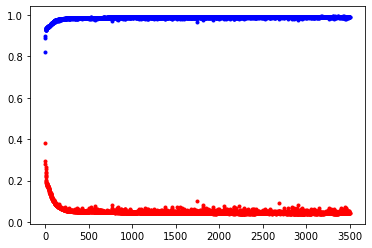

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
# 모델 실행 및 저장
history = model.fit(X, Y, epochs=3500, batch_size=500, validation_split=0.33)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장합니다.
y_vloss=history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장합니다.
y_acc = history.history['val_accuracy']

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시합니다.
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

# 결과 출력
plt.show()

# 자동 중지 모델

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
    
# 모델 실행
model.fit(X, Y, epochs=350, batch_size=500, validation_split=0.2, verbose=0, callbacks=[checkpointer, early_stopping_callback])

# 결과 출력
print("\n Accuracy : %.4f" %(model.evaluate(X,Y)[1]))


Epoch 00001: val_loss improved from inf to 0.36834, saving model to ./model/01-0.3683.hdf5

Epoch 00002: val_loss improved from 0.36834 to 0.29392, saving model to ./model/02-0.2939.hdf5

Epoch 00003: val_loss improved from 0.29392 to 0.27416, saving model to ./model/03-0.2742.hdf5

Epoch 00004: val_loss improved from 0.27416 to 0.26170, saving model to ./model/04-0.2617.hdf5

Epoch 00005: val_loss improved from 0.26170 to 0.24658, saving model to ./model/05-0.2466.hdf5

Epoch 00006: val_loss improved from 0.24658 to 0.23728, saving model to ./model/06-0.2373.hdf5

Epoch 00007: val_loss improved from 0.23728 to 0.22960, saving model to ./model/07-0.2296.hdf5

Epoch 00008: val_loss improved from 0.22960 to 0.22145, saving model to ./model/08-0.2215.hdf5

Epoch 00009: val_loss improved from 0.22145 to 0.21063, saving model to ./model/09-0.2106.hdf5

Epoch 00010: val_loss improved from 0.21063 to 0.20248, saving model to ./model/10-0.2025.hdf5

Epoch 00011: val_loss improved from 0.20248


Epoch 00096: val_loss did not improve from 0.08908

Epoch 00097: val_loss improved from 0.08908 to 0.08833, saving model to ./model/97-0.0883.hdf5

Epoch 00098: val_loss did not improve from 0.08833

Epoch 00099: val_loss did not improve from 0.08833

Epoch 00100: val_loss improved from 0.08833 to 0.08592, saving model to ./model/100-0.0859.hdf5

Epoch 00101: val_loss did not improve from 0.08592

Epoch 00102: val_loss did not improve from 0.08592

Epoch 00103: val_loss improved from 0.08592 to 0.08461, saving model to ./model/103-0.0846.hdf5

Epoch 00104: val_loss did not improve from 0.08461

Epoch 00105: val_loss did not improve from 0.08461

Epoch 00106: val_loss improved from 0.08461 to 0.08387, saving model to ./model/106-0.0839.hdf5

Epoch 00107: val_loss improved from 0.08387 to 0.08357, saving model to ./model/107-0.0836.hdf5

Epoch 00108: val_loss improved from 0.08357 to 0.08346, saving model to ./model/108-0.0835.hdf5

Epoch 00109: val_loss improved from 0.08346 to 0.08167


Epoch 00222: val_loss did not improve from 0.05427

Epoch 00223: val_loss did not improve from 0.05427

Epoch 00224: val_loss did not improve from 0.05427

Epoch 00225: val_loss did not improve from 0.05427

Epoch 00226: val_loss did not improve from 0.05427

Epoch 00227: val_loss did not improve from 0.05427

Epoch 00228: val_loss did not improve from 0.05427

Epoch 00229: val_loss did not improve from 0.05427

Epoch 00230: val_loss did not improve from 0.05427

Epoch 00231: val_loss did not improve from 0.05427

Epoch 00232: val_loss did not improve from 0.05427

Epoch 00233: val_loss did not improve from 0.05427

Epoch 00234: val_loss did not improve from 0.05427

Epoch 00235: val_loss did not improve from 0.05427

Epoch 00236: val_loss did not improve from 0.05427

Epoch 00237: val_loss did not improve from 0.05427

Epoch 00238: val_loss did not improve from 0.05427

Epoch 00239: val_loss did not improve from 0.05427

Epoch 00240: val_loss did not improve from 0.05427

Epoch 00241